# Goal: Data Cleaning

In [51]:
""" 
Goal: Data Cleaning
Author: Rudra Prasad Bhuyan
"""

' \nGoal: Data Cleaning\nAuthor: Rudra Prasad Bhuyan\n'

In [52]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-03\data\lev-03_merged.parquet"

pdf = pl.read_parquet(path)

In [54]:
pdf.collect_schema()

Schema([('Survey_Name', String),
        ('Year', String),
        ('FSU_Serial_No', String),
        ('Sector', String),
        ('State', String),
        ('NSS_Region', String),
        ('District', String),
        ('Stratum', String),
        ('Sub_stratum', String),
        ('Panel', String),
        ('Sub_sample', String),
        ('FOD_Sub_Region', String),
        ('Sample_SU_No', String),
        ('Sample_Sub_Division_No', String),
        ('Second_Stage_Stratum_No', String),
        ('Sample_Household_No', String),
        ('Questionnaire_No', String),
        ('Level', String),
        ('HH_Size_FDQ', Float64),
        ('Engaged_in_Economic_Activity_Las', String),
        ('NCO_2015_Code', String),
        ('NIC_2008_Code', String),
        ('Max_Income_Activity', String),
        ('Self_Employment_Source_Sector', String),
        ('Regular_Wage_Source_Sector', String),
        ('Casual_Labour_Source_Sector', String),
        ('Household_Type', String),
        ('Religion_o

In [55]:
mp_data = pdf.filter(
    pl.col('State') == '23'
)

In [56]:
mp_data['State'].unique()

State
str
"""23"""


# Break down all useful variables into separate group

In [57]:
lev_03_hh = ['FSU_Serial_No', 'HH_Size_FDQ', 'Household_Type',
            'Religion_of_HH_Head', 'Land_Ownership',
            'Type_of_Land_Owned','Total_Area_Land_Owned_Acres',
            'Energy_Source_Cooking', 'Energy_Source_Lighting',
            'Dwelling_Unit_Exists', 'Type_of_Dwelling_Unit',
            'Rent_Rate_Available_Rural', 'Multiplier']

lev_03_fin = [
    'Self_Employment_Source_Sector','Regular_Wage_Source_Sector',
    'Casual_Labour_Source_Sector']

lev_03_occupation = [
    'Engaged_in_Economic_Activity_Las',	'Max_Income_Activity']

lev_03_scheme = ['Benefitted_From_PMGKY']

In [58]:
lev_03_cols = (
    lev_03_hh
    + lev_03_fin
    + lev_03_occupation
    + lev_03_scheme
)

mp_data = mp_data[lev_03_cols]

mp_data

FSU_Serial_No,HH_Size_FDQ,Household_Type,Religion_of_HH_Head,Land_Ownership,Type_of_Land_Owned,Total_Area_Land_Owned_Acres,Energy_Source_Cooking,Energy_Source_Lighting,Dwelling_Unit_Exists,Type_of_Dwelling_Unit,Rent_Rate_Available_Rural,Multiplier,Self_Employment_Source_Sector,Regular_Wage_Source_Sector,Casual_Labour_Source_Sector,Engaged_in_Economic_Activity_Las,Max_Income_Activity,Benefitted_From_PMGKY
str,f64,str,str,str,str,str,str,str,str,str,str,f64,str,str,str,str,str,str
"""44085""",7.0,"""1""","""1""","""1""","""2""","""6.01""","""01""","""1""","""1""","""1""","""2""",58558.0,"""1""","""""","""""","""1""","""1""","""1"""
"""44085""",7.0,"""1""","""1""","""1""","""2""","""6.61""","""01""","""1""","""1""","""1""","""2""",58558.0,"""1""","""""","""""","""1""","""1""","""1"""
"""44085""",7.0,"""1""","""1""","""1""","""2""","""4.21""","""02""","""1""","""1""","""1""","""2""",58558.0,"""1""","""""","""""","""1""","""1""","""1"""
"""44085""",7.0,"""1""","""1""","""1""","""2""","""3.62""","""01""","""1""","""1""","""1""","""2""",58558.0,"""1""","""""","""""","""1""","""1""","""1"""
"""44085""",13.0,"""5""","""1""","""1""","""2""","""4.01""","""01""","""1""","""1""","""1""","""2""",58558.0,"""""","""""","""5""","""1""","""3""","""1"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""25137""",5.0,"""1""","""1""","""1""","""1""","""0.02""","""02""","""1""","""1""","""1""","""""",173023.0,"""""","""""","""""","""1""","""1""","""1"""
"""25137""",3.0,"""1""","""1""","""1""","""1""","""0.03""","""02""","""1""","""1""","""1""","""""",173023.0,"""""","""""","""""","""1""","""1""","""2"""
"""25137""",4.0,"""2""","""1""","""1""","""1""","""0.02""","""02""","""1""","""1""","""1""","""""",173023.0,"""""","""""","""""","""1""","""2""","""1"""


# Conversion

In [59]:
mp_data = mp_data.with_columns(
    [pl.col(col).cast(pl.Int32, strict=False) for col in lev_03_cols]
)

In [60]:
mp_data.collect_schema()

Schema([('FSU_Serial_No', Int32),
        ('HH_Size_FDQ', Int32),
        ('Household_Type', Int32),
        ('Religion_of_HH_Head', Int32),
        ('Land_Ownership', Int32),
        ('Type_of_Land_Owned', Int32),
        ('Total_Area_Land_Owned_Acres', Int32),
        ('Energy_Source_Cooking', Int32),
        ('Energy_Source_Lighting', Int32),
        ('Dwelling_Unit_Exists', Int32),
        ('Type_of_Dwelling_Unit', Int32),
        ('Rent_Rate_Available_Rural', Int32),
        ('Multiplier', Int32),
        ('Self_Employment_Source_Sector', Int32),
        ('Regular_Wage_Source_Sector', Int32),
        ('Casual_Labour_Source_Sector', Int32),
        ('Engaged_in_Economic_Activity_Las', Int32),
        ('Max_Income_Activity', Int32),
        ('Benefitted_From_PMGKY', Int32)])

# Functions

In [61]:
def summary(col):
    display(mp_data[col].sample(3))
    display(mp_data[col].describe())
    display(mp_data[col].null_count())
    display(mp_data[col].null_count() / mp_data.shape[0])

In [69]:
def plot_hist(col):
    sns.histplot(mp_data[col])
    plt.title(col)
    plt.show()

In [71]:
def check_unique(col):
    print(f"{col} contains : {mp_data[col].n_unique()}")
    display(mp_data[col].unique())

# Data

## Household 

In [62]:
summary(lev_03_hh)

FSU_Serial_No,HH_Size_FDQ,Household_Type,Religion_of_HH_Head,Land_Ownership,Type_of_Land_Owned,Total_Area_Land_Owned_Acres,Energy_Source_Cooking,Energy_Source_Lighting,Dwelling_Unit_Exists,Type_of_Dwelling_Unit,Rent_Rate_Available_Rural,Multiplier
i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32
25837,2,3,1,1,1,null,2,1,1,1,null,24223
42349,5,6,1,1,2,null,1,1,1,1,2,168925
42602,4,1,1,1,2,null,1,1,1,1,2,115095


statistic,FSU_Serial_No,HH_Size_FDQ,Household_Type,Religion_of_HH_Head,Land_Ownership,Type_of_Land_Owned,Total_Area_Land_Owned_Acres,Energy_Source_Cooking,Energy_Source_Lighting,Dwelling_Unit_Exists,Type_of_Dwelling_Unit,Rent_Rate_Available_Rural,Multiplier
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",56420.0,56420.0,56420.0,56420.0,56420.0,54348.0,0.0,56420.0,56420.0,56420.0,55600.0,33704.0,56420.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,2072.0,56420.0,0.0,0.0,0.0,820.0,22716.0,0.0
"""mean""",35892.134208,4.598653,2.792272,1.120028,1.036725,1.520277,null,1.671819,1.014747,1.014534,1.105468,1.897342,111667.115207
"""std""",8662.860768,2.152007,2.314186,0.54058,0.188086,0.514973,null,1.138049,0.328808,0.119678,0.337938,0.303517,70936.050835
"""min""",25000.0,1.0,1.0,1.0,1.0,1.0,null,1.0,1.0,1.0,1.0,1.0,1913.0
"""25%""",25278.0,3.0,1.0,1.0,1.0,1.0,null,1.0,1.0,1.0,1.0,2.0,64751.0
"""50%""",42377.0,4.0,2.0,1.0,1.0,2.0,null,2.0,1.0,1.0,1.0,2.0,114789.0
"""75%""",42727.0,6.0,5.0,1.0,1.0,2.0,null,2.0,1.0,1.0,1.0,2.0,145525.0
"""max""",44199.0,31.0,9.0,9.0,2.0,3.0,null,12.0,9.0,2.0,3.0,2.0,888474.0


FSU_Serial_No,HH_Size_FDQ,Household_Type,Religion_of_HH_Head,Land_Ownership,Type_of_Land_Owned,Total_Area_Land_Owned_Acres,Energy_Source_Cooking,Energy_Source_Lighting,Dwelling_Unit_Exists,Type_of_Dwelling_Unit,Rent_Rate_Available_Rural,Multiplier
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,2072,56420,0,0,0,820,22716,0


FSU_Serial_No,HH_Size_FDQ,Household_Type,Religion_of_HH_Head,Land_Ownership,Type_of_Land_Owned,Total_Area_Land_Owned_Acres,Energy_Source_Cooking,Energy_Source_Lighting,Dwelling_Unit_Exists,Type_of_Dwelling_Unit,Rent_Rate_Available_Rural,Multiplier
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,0.0,0.0,0.0,0.0,0.036725,1.0,0.0,0.0,0.0,0.014534,0.402623,0.0


Rent_Rate_Available_Rural contains : 3


Rent_Rate_Available_Rural
i32
1
2
3


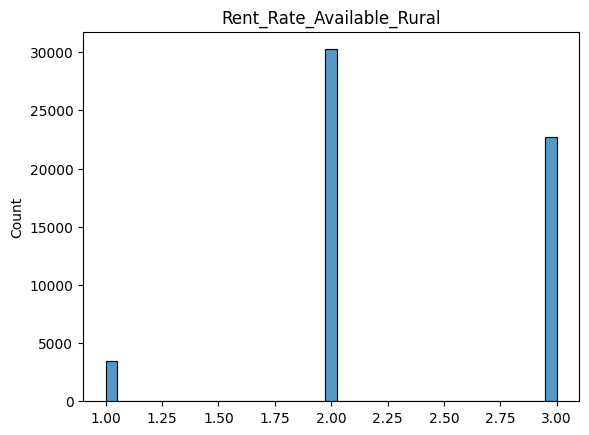

Rent_Rate_Available_Rural contains : 3


Rent_Rate_Available_Rural
i32
1
2
3


In [77]:
check_unique('Rent_Rate_Available_Rural')

plot_hist('Rent_Rate_Available_Rural')

mp_data = mp_data.with_columns(
    pl.col('Rent_Rate_Available_Rural').fill_null(value=3)
)

check_unique('Rent_Rate_Available_Rural')

Type_of_Dwelling_Unit contains : 4


Type_of_Dwelling_Unit
i32
null
1
2
3


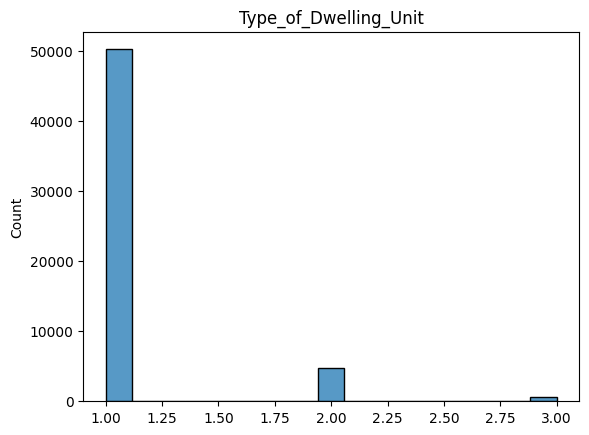

Type_of_Dwelling_Unit contains : 3


Type_of_Dwelling_Unit
i32
1
2
3


In [73]:
check_unique('Type_of_Dwelling_Unit')

plot_hist('Type_of_Dwelling_Unit')

mp_data = mp_data.with_columns(
    pl.col('Type_of_Dwelling_Unit').fill_null(value=3)
)

check_unique('Type_of_Dwelling_Unit')

Type_of_Land_Owned
i32
null
1
2
3


Type_of_Land_Owned
i32
1
2
3


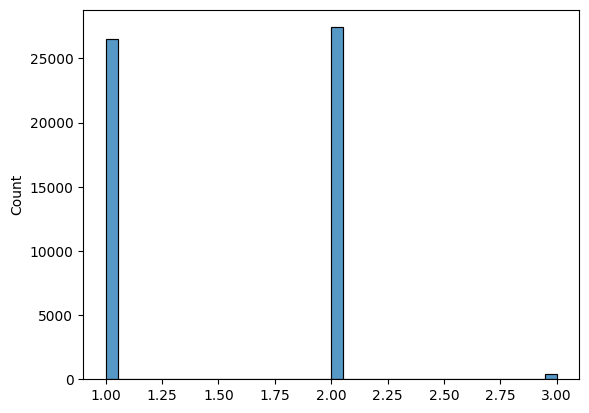

In [63]:
# Just to support the 3 😁

display(mp_data['Type_of_Land_Owned'].unique())
sns.histplot(mp_data['Type_of_Land_Owned'])

mp_data = mp_data.with_columns(
    pl.col('Type_of_Land_Owned').fill_null(value=3)
)

display(mp_data['Type_of_Land_Owned'].unique())

In [80]:
mp_data[lev_03_hh].columns

['FSU_Serial_No',
 'HH_Size_FDQ',
 'Household_Type',
 'Religion_of_HH_Head',
 'Land_Ownership',
 'Type_of_Land_Owned',
 'Total_Area_Land_Owned_Acres',
 'Energy_Source_Cooking',
 'Energy_Source_Lighting',
 'Dwelling_Unit_Exists',
 'Type_of_Dwelling_Unit',
 'Rent_Rate_Available_Rural',
 'Multiplier']

In [ ]:
for col in mp_data[lev_03_hh].columns:
    display(f" ========== {col} ========")
    display(check_unique(col))
    display("-------------------------------------------------")

' ========== FSU_Serial_No ========'

FSU_Serial_No contains : 791


FSU_Serial_No
i32
25000
25001
25002
25003
25004
…
44195
44196
44197


None

'\n\n\n -------------------------------------------------'

' ========== HH_Size_FDQ ========'

HH_Size_FDQ contains : 20


HH_Size_FDQ
i32
1
2
3
4
5
…
16
17
18


None

'\n\n\n -------------------------------------------------'

' ========== Household_Type ========'

Household_Type contains : 7


Household_Type
i32
1
2
3
4
5
6
9


None

'\n\n\n -------------------------------------------------'

' ========== Religion_of_HH_Head ========'

Religion_of_HH_Head contains : 7


Religion_of_HH_Head
i32
1
2
3
4
5
7
9


None

'\n\n\n -------------------------------------------------'

' ========== Land_Ownership ========'

Land_Ownership contains : 2


Land_Ownership
i32
1
2


None

'\n\n\n -------------------------------------------------'

' ========== Type_of_Land_Owned ========'

Type_of_Land_Owned contains : 3


Type_of_Land_Owned
i32
1
2
3


None

'\n\n\n -------------------------------------------------'

' ========== Total_Area_Land_Owned_Acres ========'

Total_Area_Land_Owned_Acres contains : 1


Total_Area_Land_Owned_Acres
i32
null


None

'\n\n\n -------------------------------------------------'

' ========== Energy_Source_Cooking ========'

Energy_Source_Cooking contains : 9


Energy_Source_Cooking
i32
1
2
3
4
6
7
9
11
12


None

'\n\n\n -------------------------------------------------'

' ========== Energy_Source_Lighting ========'

Energy_Source_Lighting contains : 5


Energy_Source_Lighting
i32
1
2
5
6
9


None

'\n\n\n -------------------------------------------------'

' ========== Dwelling_Unit_Exists ========'

Dwelling_Unit_Exists contains : 2


Dwelling_Unit_Exists
i32
1
2


None

'\n\n\n -------------------------------------------------'

' ========== Type_of_Dwelling_Unit ========'

Type_of_Dwelling_Unit contains : 3


Type_of_Dwelling_Unit
i32
1
2
3


None

'\n\n\n -------------------------------------------------'

' ========== Rent_Rate_Available_Rural ========'

Rent_Rate_Available_Rural contains : 3


Rent_Rate_Available_Rural
i32
1
2
3


None

'\n\n\n -------------------------------------------------'

' ========== Multiplier ========'

Multiplier contains : 1421


Multiplier
i32
1913
1983
2250
2400
3000
…
613888
653383
828400


None

'\n\n\n -------------------------------------------------'

## Finance

## Occupation & Schemes